In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df=pd.read_csv(r'E:\DATA\Customer_Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(columns='customerID',inplace=True)

In [11]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
df['PaymentMethod']=df['PaymentMethod'].str.replace('(automatic)','',regex=False)

In [13]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

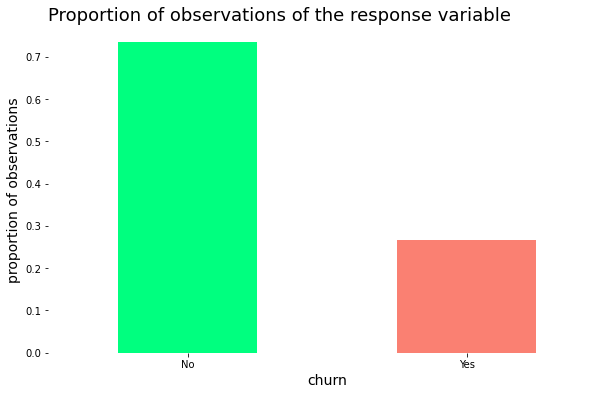

In [14]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

prop_response=df['Churn'].value_counts(normalize=True)

prop_response.plot(kind='bar',ax=ax,color=['springgreen','salmon'])

ax.set_title('Proportion of observations of the response variable',fontsize=18,loc='left')
ax.set_xlabel('churn',fontsize=14)
ax.set_ylabel('proportion of observations',fontsize=14)
ax.tick_params(rotation='auto')

spine_names=('top','right','bottom','left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [15]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    number_of_columns = 2
    number_of_rows= math.ceil(len(columns_to_plot)/2)
    
    fig=plt.figure(figsize=(12,5 * number_of_rows))
    fig.suptitle(super_title,fontsize=22, y=.95)
    
    for index,column in enumerate(columns_to_plot, 1):
        ax=fig.add_subplot(number_of_rows , number_of_columns , index)
    
        prop_by_independent = pd.crosstab(df[column],df['Churn']).apply(lambda x: x/x.sum()*100 , axis=1)
        prop_by_independent.plot(kind='bar',ax=ax ,stacked =True , rot=0, color=['springgreen','salmon'])
    
        ax.legend(loc="upper right",bbox_to_anchor=(0.62,0.5,0.5,0.5),title='Churn',fancybox=True)
        ax.set_title('Proportion of observation by '+column, fontsize=16 ,loc='left')
        ax.tick_params(rotation = 'auto')
    
        spine_names=('top','right','bottom','left')
    
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


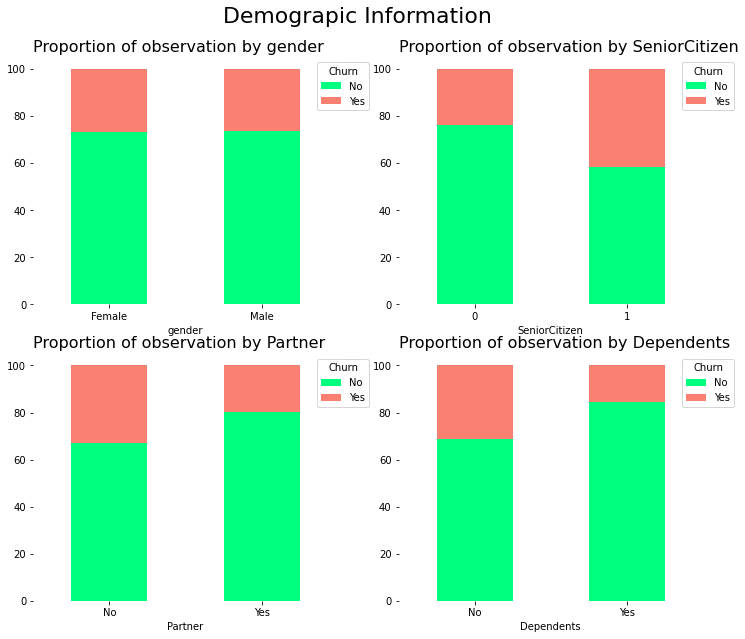

In [16]:
demographic_columns = ['gender','SeniorCitizen','Partner','Dependents']

percentage_stacked_plot(demographic_columns,'Demograpic Information')

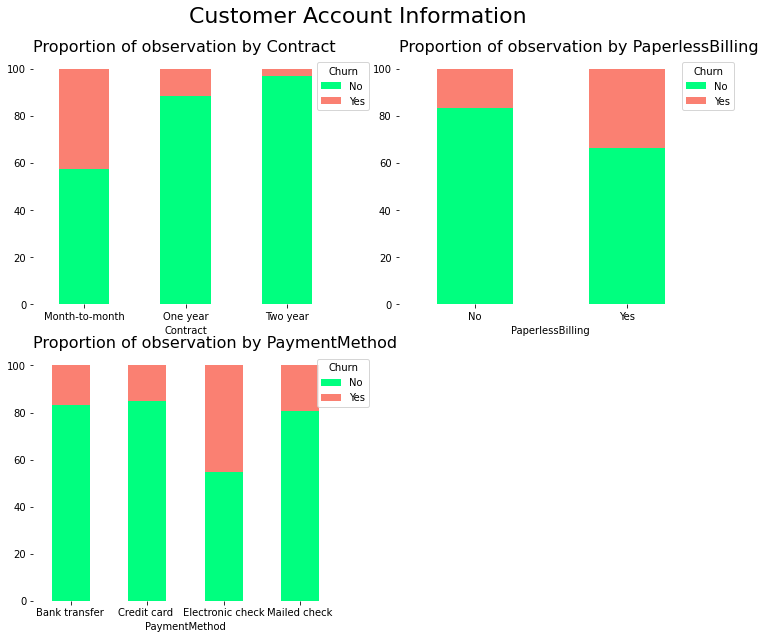

In [17]:
account_columns = ['Contract' , 'PaperlessBilling', 'PaymentMethod']
percentage_stacked_plot(account_columns, 'Customer Account Information')

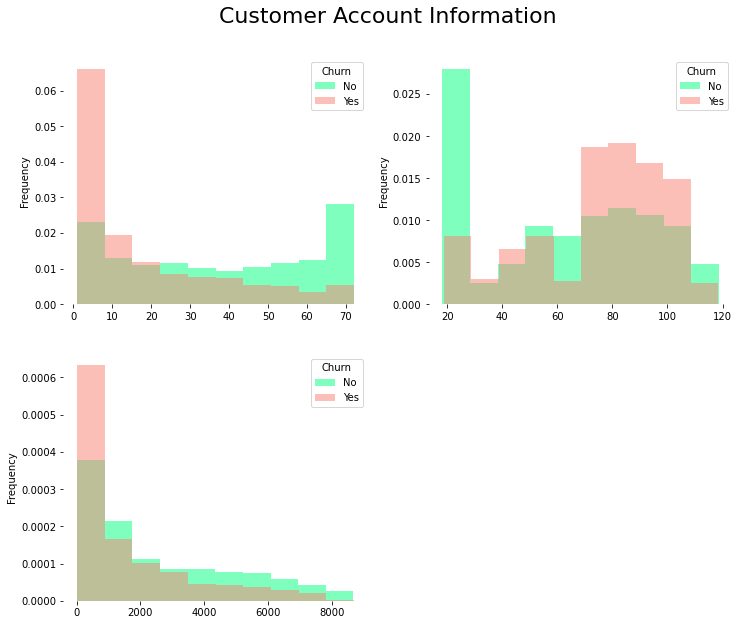

In [18]:
def histogram_plots(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows= math.ceil(len(columns_to_plot)/2)
    
    fig=plt.figure(figsize=(12,5 * number_of_rows))
    fig.suptitle(super_title , fontsize=22 , y=.95)
    
    for index , column in enumerate(columns_to_plot,1):
        
        ax=fig.add_subplot(number_of_rows, number_of_columns, index)
        
        df[df['Churn']=='No'][column].plot(kind='hist',ax=ax,density=True,alpha=0.5,color='springgreen',label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist',ax=ax,density=True,alpha=0.5,color='salmon',label='Yes')
        
        ax.legend(loc="upper right", bbox_to_anchor=(0.5,0.5,0.5,0.5), title='Churn',fancybox=True)
        ax.tick_params(rotation='auto')
        
        spine_names=('top','right','bottom','left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
account_columns_numeric =['tenure' , 'MonthlyCharges', 'TotalCharges']
histogram_plots(account_columns_numeric, 'Customer Account Information')
    

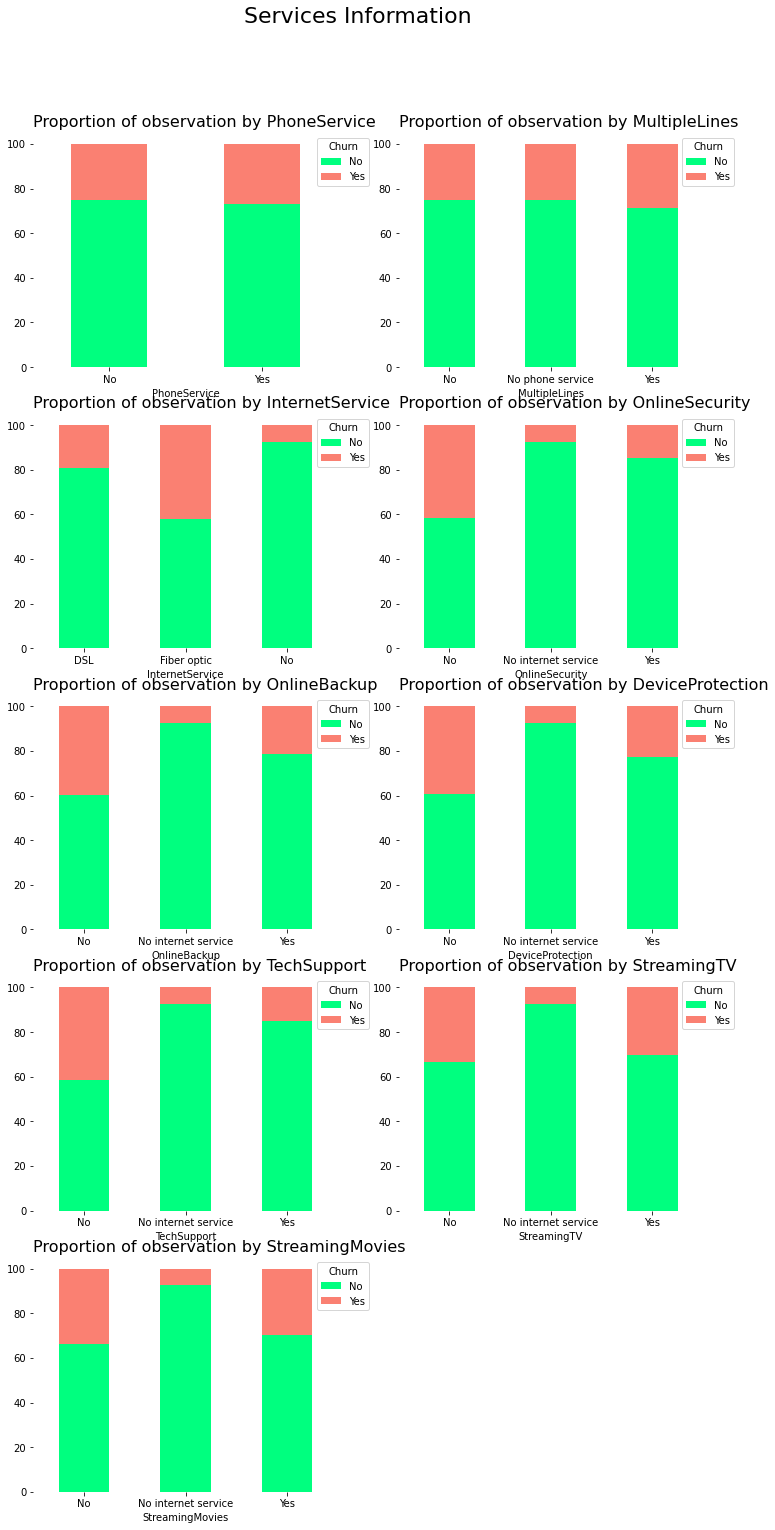

In [19]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

percentage_stacked_plot(services_columns, 'Services Information')

In [20]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

categorical_variables = df.select_dtypes(include=object).drop('Churn' ,axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [21]:
df_transformed = df.copy()

label_encoding_columns = ['gender','Partner','Dependents','PaperlessBilling','PhoneService','Churn']

for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column]=df_transformed[column].map({'Female' : 1, 'Male' : 0})
    else:
        df_transformed[column]=df_transformed[column].map({'Yes' : 1 , 'No' : 0})
        

In [22]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_transformed = pd.get_dummies(df_transformed , columns = one_hot_encoding_columns)

In [23]:
min_max_columns =['tenure','MonthlyCharges','TotalCharges']

for column  in min_max_columns:
    min_column =df_transformed[column].min()
    max_column = df_transformed[column].max()
    
    df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [24]:
X= df_transformed.drop(columns='Churn')
y=df_transformed.loc[:,'Churn']

print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer ',
       'PaymentMethod_Credit card ', 'Pa

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40,shuffle=True)

In [26]:
def create_models(seed=2):
    
    models =[]
    models.append(('dummy_classifier',DummyClassifier(random_state=seed , strategy ='most_frequent')))
    models.append(('k_nearest_neighbors',KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines' ,SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models
models=create_models()

In [27]:
results = []
names = []
scoring = 'accuracy'

for name, model in models :
    model.fit(X_train,y_train).predict(X_test)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    results.append(accuracy)
    names.append(name)
    print('Classifier : {}, Accuracy: {}'.format(name,accuracy))

Classifier : dummy_classifier, Accuracy: 0.745164960182025
Classifier : k_nearest_neighbors, Accuracy: 0.7531285551763367
Classifier : logistic_regression, Accuracy: 0.7923777019340159


C:\Users\Sanskriti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier : support_vector_machines, Accuracy: 0.7878270762229806
Classifier : random_forest, Accuracy: 0.7713310580204779
Classifier : gradient_boosting, Accuracy: 0.7963594994311718


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],'max_depth': [3, 4, 5, 6],'max_features': [None, 'auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5]}



random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=grid_parameters,cv=5, n_iter=150, n_jobs=-1)


random_search.fit(X_train, y_train)


print(random_search.best_params_)

{'n_estimators': 115, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 3}


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
random_search_predictions = random_search.predict(X_test)
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

confusion_matrix

array([[1151,  159],
       [ 193,  255]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1310
           1       0.62      0.57      0.59       448

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [35]:
accuracy_score(y_test, random_search_predictions)

0.7997724687144482